<a href="https://colab.research.google.com/github/DiogoMatheus22/LH_CD_Diogo/blob/main/LightHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


In [5]:
base = pd.read_csv('desafio_indicium_imdb.csv')
base_0 = base

In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [7]:
base['Gross'] = base['Gross'].str.replace(',','').astype(float)
base['Runtime'] = base['Runtime'].str.extract('(\d+)').astype(float)

In [8]:
base = base.drop("Unnamed: 0",axis=1) #REMOVER o contador para usar no Profile
base = base.dropna().reset_index(drop=True)
base.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   713 non-null    object 
 1   Released_Year  713 non-null    object 
 2   Certificate    713 non-null    object 
 3   Runtime        713 non-null    float64
 4   Genre          713 non-null    object 
 5   IMDB_Rating    713 non-null    float64
 6   Overview       713 non-null    object 
 7   Meta_score     713 non-null    float64
 8   Director       713 non-null    object 
 9   Star1          713 non-null    object 
 10  Star2          713 non-null    object 
 11  Star3          713 non-null    object 
 12  Star4          713 non-null    object 
 13  No_of_Votes    713 non-null    int64  
 14  Gross          713 non-null    float64
dtypes: float64(4), int64(1), object(10)
memory usage: 83.7+ KB


In [9]:
base.head(20)

Series_Title Released_Year  \
0                                       The Godfather          1972   
1                                     The Dark Knight          2008   
2                              The Godfather: Part II          1974   
3                                        12 Angry Men          1957   
4       The Lord of the Rings: The Return of the King          2003   
5                                        Pulp Fiction          1994   
6                                    Schindler's List          1993   
7                                           Inception          2010   
8                                          Fight Club          1999   
9   The Lord of the Rings: The Fellowship of the Ring          2001   
10                                       Forrest Gump          1994   
11                    Il buono, il brutto, il cattivo          1966   
12              The Lord of the Rings: The Two Towers          2002   
13                                         The Matrix          1999   
14                                         Goodfellas          1990   
15     Star Wars: Episode V - The Empire Strikes Back          1980   
16                    One Flew Over the Cuckoo's Nest          1975   
17                                       Gisaengchung          2019   
18                                       Interstellar          2014   
19                                     Cidade de Deus          2002   

   Certificate  Runtime                       Genre  IMDB_Rating  \
0            A    175.0                Crime, Drama          9.2   
1           UA    152.0        Action, Crime, Drama          9.0   
2            A    202.0                Crime, Drama          9.0   
3            U     96.0                Crime, Drama          9.0   
4            U    201.0    Action, Adventure, Drama          8.9   
5            A    154.0                Crime, Drama          8.9   
6            A    195.0   Biography, Drama, History          8.9   
7           UA    148.0   Action, Adventure, Sci-Fi          8.8   
8            A    139.0                       Drama          8.8   
9            U    178.0    Action, Adventure, Drama          8.8   
10          UA    142.0              Drama, Romance          8.8   
11           A    161.0                     Western          8.8   
12          UA    179.0    Action, Adventure, Drama          8.7   
13           A    136.0              Action, Sci-Fi          8.7   
14           A    146.0     Biography, Crime, Drama          8.7   
15          UA    124.0  Action, Adventure, Fantasy          8.7   
16           A    133.0                       Drama          8.7   
17           A    132.0     Comedy, Drama, Thriller          8.6   
18          UA    169.0    Adventure, Drama, Sci-Fi          8.6   
19           A    130.0                Crime, Drama          8.6   

                                             Overview  Meta_score  \
0   An organized crime dynasty's aging patriarch t...       100.0   
1   When the menace known as the Joker wreaks havo...        84.0   
2   The early life and career of Vito Corleone in ...        90.0   
3   A jury holdout attempts to prevent a miscarria...        96.0   
4   Gandalf and Aragorn lead the World of Men agai...        94.0   
5   The lives of two mob hitmen, a boxer, a gangst...        94.0   
6   In German-occupied Poland during World War II,...        94.0   
7   A thief who steals corporate secrets through t...        74.0   
8   An insomniac office worker and a devil-may-car...        66.0   
9   A meek Hobbit from the Shire and eight compani...        92.0   
10  The presidencies of Kennedy and Johnson, the e...        82.0   
11  A bounty hunting scam joins two men in an unea...        90.0   
12  While Frodo and Sam edge closer to Mordor with...        87.0   
13  When a beautiful stranger leads computer hacke...        73.0   
14  The story of Henry Hill and his life in the mo...        90.0   
15  After the Re

In [10]:
# Neste momento iniciamente se faz uma Análise Exploratória de Dados (EDA)
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 35.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=97330ca1a2afc6fb185fc9d98d12feeb5af237cbe7f6060faf31a5e92dc638d5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [11]:

# Instalar ydata_profiling
!pip install ydata-profiling

# Importando ProfileReport do ydata_profiling
from ydata_profiling import ProfileReport
Relatório_EDA = ProfileReport(base, title ="EDA")
Relatório_EDA

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Até aqui pode-se perceber de forma superficial que existe uma correlação entre a nota do IMDB e o faturamento e também o número de votos

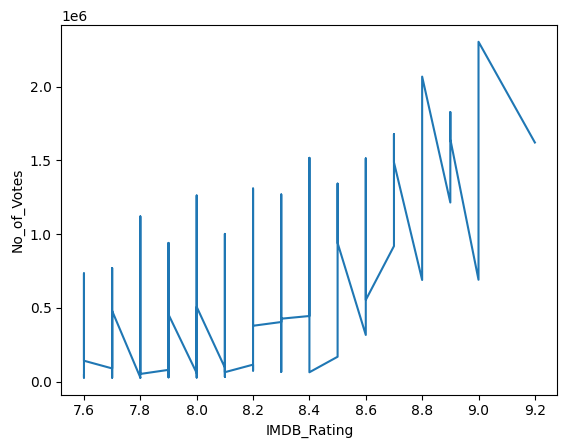

In [12]:
plt.plot(base['IMDB_Rating'],base['No_of_Votes'])
plt.xlabel('IMDB_Rating')
plt.ylabel('No_of_Votes')
plt.show()

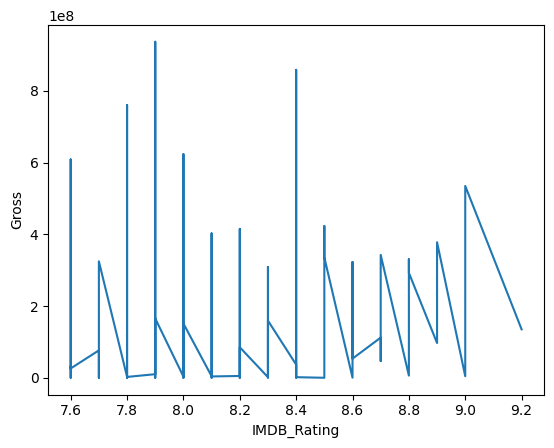

In [13]:
plt.plot(base['IMDB_Rating'],base['Gross'])
plt.xlabel('IMDB_Rating')
plt.ylabel('Gross')
plt.show()

Boa parte das comparações entre variaveis é possivel de analisar no profile, porém suas comparações são apenas entre variaveis númericas, neste ramo é importante saber quanto os atores e produtores influenciam a nota do IMDB

In [14]:
# relação atores e nota IMDB
base_A1 = base[['Star1','IMDB_Rating']]
nova_base_A1 = base_A1.groupby('Star1', as_index=False).mean()
nova_base_A1 = nova_base_A1.sort_values(by='IMDB_Rating', ascending=False)
base_A1 = base_A1.rename(columns={'Star1': 'Atores'})
base_A1



Atores  IMDB_Rating
0     Marlon Brando          9.2
1    Christian Bale          9.0
2         Al Pacino          9.0
3       Henry Fonda          9.0
4       Elijah Wood          8.9
..              ...          ...
708     Rod Steiger          7.6
709  Clint Eastwood          7.6
710     Phil Harris          7.6
711     John Lennon          7.6
712  Burt Lancaster          7.6

[713 rows x 2 columns]

In [15]:
base_A2 = base[['Star2','IMDB_Rating']]
nova_base_A2 = base_A2.groupby('Star2', as_index=False).mean()
nova_base_A2 = nova_base_A2.sort_values(by='IMDB_Rating', ascending=False)
base_A2 = base_A2.rename(columns={'Star2': 'Atores'})
base_A2


Atores  IMDB_Rating
0           Al Pacino          9.2
1        Heath Ledger          9.0
2      Robert De Niro          9.0
3         Lee J. Cobb          9.0
4     Viggo Mortensen          8.9
..                ...          ...
708      James Coburn          7.6
709     Telly Savalas          7.6
710   Sebastian Cabot          7.6
711    Paul McCartney          7.6
712  Montgomery Clift          7.6

[713 rows x 2 columns]

In [16]:
base_A3 = base[['Star3','IMDB_Rating']]
nova_base_A3 = base_A3.groupby('Star3', as_index=False).mean()
nova_base_A3 = nova_base_A3.sort_values(by='IMDB_Rating', ascending=False)
base_A3 = base_A3.rename(columns={'Star3': 'Atores'})
base_A3


Atores  IMDB_Rating
0         James Caan          9.2
1      Aaron Eckhart          9.0
2      Robert Duvall          9.0
3      Martin Balsam          9.0
4       Ian McKellen          8.9
..               ...          ...
708     Romolo Valli          7.6
709      Don Rickles          7.6
710      Louis Prima          7.6
711  George Harrison          7.6
712     Deborah Kerr          7.6

[713 rows x 2 columns]

In [17]:
base_A4 = base[['Star4','IMDB_Rating']]
nova_base_A4 = base_A4.groupby('Star4', as_index=False).mean()
nova_base_A4 = nova_base_A4.sort_values(by='IMDB_Rating', ascending=False)
base_A4 = base_A4.rename(columns={'Star4': 'Atores'})
base_A4


Atores  IMDB_Rating
0        Diane Keaton          9.2
1       Michael Caine          9.0
2        Diane Keaton          9.0
3        John Fiedler          9.0
4       Orlando Bloom          8.9
..                ...          ...
708       Maria Monti          7.6
709  Carroll O'Connor          7.6
710  Bruce Reitherman          7.6
711       Ringo Starr          7.6
712        Donna Reed          7.6

[713 rows x 2 columns]

In [18]:
df_concat = pd.concat([base_A1, base_A2, base_A3, base_A4])

# Agrupar pelo nome e somar os valores
#df_resultado = df_concat.groupby('Atores', as_index=False)['IMDB_Rating'].sum()
base_atores = df_concat.groupby('Atores', as_index=False).mean()
base_atores = base_atores.sort_values(by='IMDB_Rating', ascending=False)
base_atores

Atores  IMDB_Rating
1            Aaron Eckhart          9.0
256       Caroline Goodall          8.9
909          John Travolta          8.9
33            Aldo Giuffrè          8.8
495            Elliot Page          8.8
...                    ...          ...
484         Elisabeth Shue          7.6
1567          Rufus Sewell          7.6
486             Elit Iscan          7.6
1102        Lindsay Duncan          7.6
936   Joséphine Lebas-Joly          7.6

[1912 rows x 2 columns]

In [22]:
#mesma coisa mas para diretores
base_diretor = base[['Director','IMDB_Rating']]
base_diretor = base_diretor.groupby('Director', as_index=False).mean()
base_diretor = base_diretor.sort_values(by='IMDB_Rating', ascending=False)
base_diretor

Director  IMDB_Rating
211    Lana Wachowski          8.7
138    Irvin Kershner          8.7
116      George Lucas          8.6
103    Frank Darabont          8.6
318   Roberto Benigni          8.6
..                ...          ...
239       Matt Reeves          7.6
180  John Lee Hancock          7.6
375     Tony Bancroft          7.6
10        Alex Proyas          7.6
325          Ronny Yu          7.6

[402 rows x 2 columns]

Para uma situação em que não se conhece uma pessoa, não se tem os dados sobre seu gosto, interesses e preferências para fazer uma recomendação. Portanto o indicado é uma recomendação generalista, recomendar os filmes mais bem avaliados e em diversas classificações, e generos, já que não se sabe também a idade da pessoa. Para esse caso pode-se voltar para a pesquisa operacional em que podemos selecionar o melhor grupo de filmes com base em restrições criadas pensando nesta questão da generalização

Para este caso queremos recomendar o filme Xi i e {0,1,...,713} que possui [a,b,c...,p] parametros {Ano de lançamento, Certificate, Classificação etária, Tempo de duração, Gênero, Nota do IMDB, Overview do filme, Média ponderada de todas as críticas, Diretor, Ator/atriz #1, Ator/atriz #2, Ator/atriz #3, Ator/atriz #4
,Número de votos,Faturamento}

Vamos supor que só podemos recomendar 10 filmes para a certa pessoa desconhecida (não faz sentido recomendar um monte de filmes, a pessoa não quer ficar olhando um monte de filme que por ser uma recomendação generalista uma parte pode não agradar) e as restrições são definidas por um especialista no assunto, por exemplo: devem ser recomendados pelo menos dois filmes de drama.
filme i parametro j caracteristica k nesse caso, para todo i (filme selecionado), na coluna j = E (Genero), k = 2 (drama)

In [23]:
base_genero = base[['Series_Title','Genre']]
base_genero

Series_Title  \
0                                    The Godfather   
1                                  The Dark Knight   
2                           The Godfather: Part II   
3                                     12 Angry Men   
4    The Lord of the Rings: The Return of the King   
..                                             ...   
708                                   Giù la testa   
709                                 Kelly's Heroes   
710                                The Jungle Book   
711                             A Hard Day's Night   
712                          From Here to Eternity   

                            Genre  
0                    Crime, Drama  
1            Action, Crime, Drama  
2                    Crime, Drama  
3                    Crime, Drama  
4        Action, Adventure, Drama  
..                            ...  
708           Drama, War, Western  
709        Adventure, Comedy, War  
710  Animation, Adventure, Family  
711        Comedy, Music, Musical  
712           Drama, Romance, War  

[713 rows x 2 columns]

In [24]:
#todos os tipos de generos
# Separar os gêneros e expandi-los em linhas distintas
base_genero_expanded = base_genero.assign(Genre=base_genero['Genre'].str.split(',')).explode('Genre')

# Remover espaços em branco extras
base_genero_expanded['Genre'] = base_genero_expanded['Genre'].str.strip()



# Exibir o DataFrame expandido
print(base_genero_expanded.head(30))
generos = []
for i in base_genero_expanded['Genre'].unique():
    generos.append(i)
generos

                                         Series_Title      Genre
0                                       The Godfather      Crime
0                                       The Godfather      Drama
1                                     The Dark Knight     Action
1                                     The Dark Knight      Crime
1                                     The Dark Knight      Drama
2                              The Godfather: Part II      Crime
2                              The Godfather: Part II      Drama
3                                        12 Angry Men      Crime
3                                        12 Angry Men      Drama
4       The Lord of the Rings: The Return of the King     Action
4       The Lord of the Rings: The Return of the King  Adventure
4       The Lord of the Rings: The Return of the King      Drama
5                                        Pulp Fiction      Crime
5                                        Pulp Fiction      Drama
6                        

['Crime',
 'Drama',
 'Action',
 'Adventure',
 'Biography',
 'History',
 'Sci-Fi',
 'Romance',
 'Western',
 'Fantasy',
 'Comedy',
 'Thriller',
 'Animation',
 'Family',
 'War',
 'Mystery',
 'Music',
 'Horror',
 'Sport',
 'Musical',
 'Film-Noir']

In [25]:
#todos os tipos de classificação
# Separar os gêneros e expandi-los em linhas distintas
base_certificate = base[['Series_Title','Certificate']]



# Exibir o DataFrame expandido
print(base_certificate.head(30))
certificate = []
for i in base_certificate['Certificate'].unique():
  certificate.append(i)


certificate

                                         Series_Title Certificate
0                                       The Godfather           A
1                                     The Dark Knight          UA
2                              The Godfather: Part II           A
3                                        12 Angry Men           U
4       The Lord of the Rings: The Return of the King           U
5                                        Pulp Fiction           A
6                                    Schindler's List           A
7                                           Inception          UA
8                                          Fight Club           A
9   The Lord of the Rings: The Fellowship of the Ring           U
10                                       Forrest Gump          UA
11                    Il buono, il brutto, il cattivo           A
12              The Lord of the Rings: The Two Towers          UA
13                                         The Matrix           A
14        

['A',
 'UA',
 'U',
 'R',
 'G',
 'PG-13',
 'PG',
 'Passed',
 'Approved',
 'TV-PG',
 'U/A',
 'GP']

Construindo um modelo
Como dito anteriormente, o ideal é um espcialista definir as restrições, pois possui mais conhecimento e experiência do negócio, ou em ocasiões em que não se tem esse apoio estatísticas básicas podem ajudar a definir as restrições por exemplo dois dos 20% dos filmes com mais nota no IMDB devem ser colocados.

Aqui farei um modelo simples (para não o case não ficar muito extenso), de forma que a função objetivo é SOMATÓRIO Max [Xi*Ej/10 + Xi*Fj/100] --forma de maximizar os filmes mais bem pontuados Ej (IMDB_Rating) e Fj (Meta_score)

Restrição 1: 10 filmes para recomendar SOMATÓRIO[Xi] = 10

Restrição 2: Xi = 1 se selecionado, caso não = 0

Restrição 3: devem ter pelo menos 3 filmes de ação, 2 filmes de drama, 2 filmes de comédia 1 filme de horror, 1 filme familia,1 filme animação
Xi*D2 >=3 se Xi = 1
Xi*D1 >=2 se Xi = 1
Xi*D10>=2  se Xi = 1
Xi*D17>=1 se Xi = 1
Xi*D13 >= 1 se Xi = 1
Xi*D12>= 1 se Xi = 1

Restrição 4: Devem haver pelo menos 2 filmeS de classificação A, UA, PG. E 1 filme de classificação R,G e Passed

Xi*B0>=2 se Xi = 1
Xi*B1>=2 se Xi = 1
Xi*B6>=2 se Xi = 1
Xi*B3>=1 se Xi = 1
Xi*B4>=1 se Xi = 1
Xi*B7>=1 se Xi = 1


i e {1,2,...,713}
j e {A,B,...,P}



In [26]:
!pip install pulp

import pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 40.2 MB/s eta 0:00:00


In [27]:
print(base['IMDB_Rating'])
# Índices dos filmes
indices = range(len(base['Series_Title']))
indices

0      9.2
1      9.0
2      9.0
3      9.0
4      8.9
      ... 
708    7.6
709    7.6
710    7.6
711    7.6
712    7.6
Name: IMDB_Rating, Length: 713, dtype: float64


range(0, 713)

In [28]:
# Índices dos filmes
indices = range(len(base['Series_Title']))

# resolvendo o modelo PL
prob = pulp.LpProblem("Seleção_de_Filmes", pulp.LpMaximize)

# Variáveis de decisão
x = pulp.LpVariable.dicts("x", indices, cat=pulp.LpBinary)

# Função objetivo: maximizar a soma das notas dos filmes escolhidos
prob += pulp.lpSum((base['IMDB_Rating'][i]/10 * x[i]) + (base['Meta_score'][i]/100 * x[i]) for i in indices)

# Restrições
# Exatamente 10 filmes devem ser escolhidos
prob += pulp.lpSum([x[i] for i in indices]) == 10

# Pelo menos 3 filmes devem ser do gênero "ação"
prob += pulp.lpSum([x[i] for i in indices if base['Genre'][i] == 'Action']) >= 3

# Pelo menos 2 filmes devem ser do gênero "drama" e outros 2 filmes de "comédia"
prob += pulp.lpSum([x[i] for i in indices if base['Genre'][i] == 'Drama']) >= 2 # Use a coluna original 'Genre' e verifique se contém 'Drama'
prob += pulp.lpSum([x[i] for i in indices if base['Genre'][i] == 'Comedy']) >= 2 # Use a coluna original 'Genre' e verifique se contém 'Comedy'

# Pelo menos 1 filme deve ser do gênero "Familia','Animação', 'Horror'
prob += pulp.lpSum([x[i] for i in indices if base['Genre'][i] == 'Animation']) >= 1 # Use a coluna original 'Genre' e verifique se contém 'Animation'
prob += pulp.lpSum([x[i] for i in indices if base['Genre'][i] == 'Family']) >= 1 # Use a coluna original 'Genre' e verifique se contém 'Family'
prob += pulp.lpSum([x[i] for i in indices if base['Genre'][i] == 'Horror']) >= 1 # Use a coluna original 'Genre' e verifique se contém 'Horror'

# pelo menos 2 filmes devem ser de classificação "AU" "A"e "PG"
prob += pulp.lpSum([x[i] for i in indices if base['Certificate'][i] == "AU"]) >= 2 # Use a coluna original 'Certificate'
prob += pulp.lpSum([x[i] for i in indices if base['Certificate'][i] == "A"]) >= 2 # Use a coluna original 'Certificate'
prob += pulp.lpSum([x[i] for i in indices if base['Certificate'][i] == "PG"]) >= 2 # Use a coluna original 'Certificate'

# pelo menos 2 filmes devem ser de classificação "R","G" e "Passed"
prob += pulp.lpSum([x[i] for i in indices if base['Certificate'][i] == "R"]) >= 1 # Use a coluna original 'Certificate'
prob += pulp.lpSum([x[i] for i in indices if base['Certificate'][i] == "G"]) >= 1 # Use a coluna original 'Certificate'
prob += pulp.lpSum([x[i] for i in indices if base['Certificate'][i] == "Passed"]) >= 1 # Use a coluna original 'Certificate'

# Resolver o problema
prob.solve()

# Mostrar os resultados
print("Status:", pulp.LpStatus[prob.status])
print("Filmes Selecionados:")
for i in indices:
    if pulp.value(x[i]) == 1:
        print(base['Series_Title'][i])
        print("Nota IMDB:", base['IMDB_Rating'][i])
        print("Nota Meta:", base['Meta_score'][i])

Status: Infeasible
Filmes Selecionados:
The Godfather
Nota IMDB: 9.2
Nota Meta: 100.0
12 Angry Men
Nota IMDB: 9.0
Nota Meta: 96.0
The Lord of the Rings: The Return of the King
Nota IMDB: 8.9
Nota Meta: 94.0
Shichinin no samurai
Nota IMDB: 8.6
Nota Meta: 98.0
Casablanca
Nota IMDB: 8.5
Nota Meta: 100.0
City Lights
Nota IMDB: 8.5
Nota Meta: 99.0
Apocalypse Now
Nota IMDB: 8.4
Nota Meta: 94.0
Rear Window
Nota IMDB: 8.4
Nota Meta: 100.0
Lawrence of Arabia
Nota IMDB: 8.3
Nota Meta: 100.0
Citizen Kane
Nota IMDB: 8.3
Nota Meta: 100.0


Até aqui se fez
1º Analise exploratória de Dados (EDA)
2º b) Através do EDA é possivel responder que o faturamento de um filme tem alta correlação com o numero de votos e a classificação do filme.
  a) através de um modelo de programação linear foi selecionado 10 possiveis filmes que possam atrair uma pessoa desconhecida, levando em consideração distribuição de opções: restrições que obrigam o modelo a ter uma quantidade x de generos e classsificações e leva em conta as pontuações dos filmes

Agora se Utilizara aprendizado de maquina para responder
Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score


# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(base['Overview'], base['Genre'], test_size=0.2, random_state=42)

# Criar um pipeline que transforma os textos usando TF-IDF e treina um modelo Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.11188811188811189
Relatório de Classificação:
                               precision    recall  f1-score   support

           Action, Adventure       0.00      0.00      0.00         1
   Action, Adventure, Comedy       0.00      0.00      0.00         1
    Action, Adventure, Drama       0.00      0.00      0.00         2
  Action, Adventure, Fantasy       0.00      0.00      0.00         1
  Action, Adventure, History       0.00      0.00      0.00         1
   Action, Adventure, Sci-Fi       0.00      0.00      0.00         4
    Action, Biography, Drama       0.00      0.00      0.00         1
        Action, Crime, Drama       0.00      0.00      0.00         6
     Action, Crime, Thriller       0.00      0.00      0.00         3
      Action, Drama, Mystery       0.00      0.00      0.00         3
       Action, Drama, Sci-Fi       0.00      0.00      0.00         1
   Action, Mystery, Thriller       0.00      0.00      0.00         1
              Action, Sci-Fi  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Com os dados fornecidos não consegui uma boa acuracia para prever um genero a partir do overview

Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Trata-se de um problema de regressão, toda vez que queremos determinar um numero continuo trabalhamos com a regressão, para o treinamento do meu modelo foi retirado o overview

In [35]:
!pip install category_encoders

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from category_encoders import OneHotEncoder



base_para_ml = base.drop('Overview', axis=1)

X = base_para_ml.drop('IMDB_Rating', axis=1)
y = base_para_ml['IMDB_Rating']

# Identificar colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Criar um pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Aplicar o pré-processamento aos dados
X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Treinar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.03972295804195791


In [36]:
novo_filme = pd.DataFrame({'Series_Title': ['The Shawshank Redemption'], # Made these lists
 'Released_Year': [1994],
 'Certificate': ['A'],
 'Runtime': [142],
 'Genre': ['Drama'],
 'Meta_score': [80.0],
 'Director': ['Frank Darabont'],
 'Star1': ['Tim Robbins'],
 'Star2': ['Morgan Freeman'],
 'Star3': ['Bob Gunton'],
 'Star4': ['William Sadler'],
 'No_of_Votes': [2343110],
 'Gross': [28341469]})


novo_filme['Series_Title'] = novo_filme['Series_Title'].astype(str)

novo_filme_processed = preprocessor.transform(novo_filme)
previsao = model.predict(novo_filme_processed)
print(f'Previsão do IMDb: {previsao[0]}')


Previsão do IMDb: 8.806999999999993
